# Decision Tree

Decision Tree (Pohon Keputusan) adalah salah satu algoritma machine learning yang populer untuk pemodelan klasifikasi dan regresi. Algoritma ini membagi dataset menjadi subset yang lebih kecil dan lebih sederhana berdasarkan aturan keputusan yang dibuat dari fitur-fitur dataset.

## Konsep Matematika Algoritma Decision Tree

Pohon keputusan terdiri dari simpul (node) yang mewakili keputusan, cabang (branch) yang mewakili aturan keputusan, dan daun (leaf) yang mewakili hasil atau label. Proses pemisahan dataset dilakukan dengan memilih fitur yang paling baik memisahkan data menjadi kelompok-kelompok homogen.

#### ID3 (Iterative Dichotomiser 3)

- **Kriteria Pemisahan**: Information Gain
  - **Entropy**: Mengukur ketidakpastian atau impurity dalam sebuah dataset. Entropy dari dataset \( $S$ \) dengan \( $c$ \) kelas dihitung sebagai:
   
    $$Entropy(S) = - \sum_{i=1}^{c} p_i \log_2(p_i)$$
    
    di mana \( $p_i$ \) adalah proporsi dari kelas \( $i$ \) dalam dataset \( $S$ \).
  - **Information Gain**: Pengurangan dalam entropy setelah dataset dibagi berdasarkan atribut \( A \). Didefinisikan sebagai:
    \
    $$Gain(S, A) = Entropy(S) - \sum_{v \in \text{values}(A)} \frac{|S_v|}{|S|} Entropy(S_v)$$
    \
    di mana \( $S_v$ \) adalah subset dari \( $S$ \) untuk nilai \( $v$ \) dari atribut \( $A$ \).

#### C4.5

- **Kriteria Pemisahan**: Gain Ratio
  - **Entropy dan Information Gain**: Sama seperti ID3.
  - **Split Information**: Mengukur potensi dari atribut untuk membagi dataset, menghitung entropy dari distribusi instance ke subset yang dihasilkan oleh atribut. Didefinisikan sebagai:
    
    $$SplitInfo(A) = - \sum_{v \in \text{values}(A)} \frac{|S_v|}{|S|} \log_2 \left( \frac{|S_v|}{|S|} \right)$$
    
  - **Gain Ratio**: Menormalkan Information Gain dengan Split Information untuk mengatasi bias atribut dengan banyak nilai. Didefinisikan sebagai:
    
    $$GainRatio(S, A) = \frac{Gain(S, A)}{SplitInfo(A)}$$
    

#### CART (Classification and Regression Trees)

- **Kriteria Pemisahan**: 
  - **Indeks Gini** (untuk klasifikasi): Mengukur impurity dari dataset. Untuk dataset \( $S$ \) dengan \( $c$ \) kelas, dihitung sebagai:
    
    $$Gini(S) = 1 - \sum_{i=1}^{c} p_i^2$$
    
    di mana \( $p_i$ \) adalah proporsi dari kelas \( $i$ \) dalam dataset \( $S$ \).
  - **Gini Gain**: Pengurangan dalam impurity setelah dataset dibagi berdasarkan atribut \( $A$ \). Didefinisikan sebagai:
    
    $$GiniGain(S, A) = Gini(S) - \sum_{v \in \text{values}(A)} \frac{|S_v|}{|S|} Gini(S_v)$$
    
  - **Mean Squared Error (MSE)** (untuk regresi): Mengukur rata-rata kuadrat perbedaan antara nilai yang diprediksi dan nilai aktual. Untuk dataset \( $S$ \) dengan nilai aktual \( $y_i$ \) dan nilai prediksi \( $\hat{y_i}$ \), dihitung sebagai:
    
    $$MSE(S) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2$$
    
  - **Reduction in Variance**: Pengurangan dalam MSE setelah dataset dibagi berdasarkan atribut \( $A$ \). Didefinisikan sebagai:
    
    $$MSE_{reduction}(S, A) = MSE(S) - \sum_{v \in \text{values}(A)} \frac{|S_v|}{|S|} MSE(S_v)$$


### Perbandingan Algoritma Decision Tree: ID3, C4.5, dan CART

| Aspek                    | ID3                            | C4.5                          | CART                        |
|--------------------------|--------------------------------|-------------------------------|-----------------------------|
| **Penemu**               | Ross Quinlan (1986)            | Ross Quinlan (1993)           | Leo Breiman et al. (1984)   |
| **Kriteria Pemisahan**   | Gain Informasi                 | Gain Ratio                    | Indeks Gini (Klasifikasi), MSE (Regresi) |
| **Pemangkasan (Pruning)**| Tidak ada                      | Post-pruning                  | Cost-Complexity Pruning     |
| **Jenis Data**           | Kategori                       | Kategori dan Numerik          | Kategori dan Numerik        |
| **Penanganan Missing Values** | Tidak ada                 | Ada                           | Ada                         |
| **Output**               | Pohon Keputusan                | Pohon Keputusan               | Pohon Klasifikasi atau Regresi |
| **Kelebihan**            | Sederhana, mudah dipahami      | Mengatasi overfitting, menangani atribut numerik dan missing values | Fleksibel untuk klasifikasi dan regresi, mekanisme pemangkasan yang baik |
| **Kekurangan**           | Rentan terhadap overfitting, tidak menangani atribut numerik atau missing values dengan baik | Lebih kompleks, lebih lambat dibandingkan ID3 | Bisa menghasilkan pohon yang besar dan kompleks jika tidak dikendalikan |


## Contoh Ilustrasi

Berikut adalah ilustrasi dari decision tree yang menunjukkan bagaimana algoritma ini memisahkan data berdasarkan aturan keputusan:

![Decision Tree Illustration](https://upload.wikimedia.org/wikipedia/commons/f/f3/CART_tree_titanic_survivors.png)

Gambar di atas menunjukkan ilustrasi dari Decision Tree yang memisahkan data berdasarkan aturan-aturan yang diperoleh dari fitur-fitur data. Setiap simpul dalam pohon tersebut mewakili keputusan berdasarkan nilai fitur-fitur tertentu.


# Import Library

In [1]:
import numpy as np
import pandas as pd

# Library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder

#for decision tree object
from sklearn.tree import DecisionTreeClassifier

#for visualizing tree 
from sklearn.tree import plot_tree

#for checking testing results
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix

# Input Data

In [2]:
df = pd.read_csv('./data/mobile.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


# Check Missing Value

In [3]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

# Information of dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
df.price_range.value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

# Train-Test Split

In [6]:
X = df.drop(columns='price_range')
y = df.price_range

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1800, 20), (200, 20), (1800,), (200,))

In [7]:
X_train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

# Scaling

In [8]:
columns = ['battery_power', 'clock_speed', 'int_memory', 'm_dep', 'mobile_wt',
           'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

scaler = StandardScaler()
X_train[columns] = scaler.fit_transform(X_train[columns])
X_test[columns] = scaler.transform(X_test[columns])

# Decision Tree Model

In [9]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

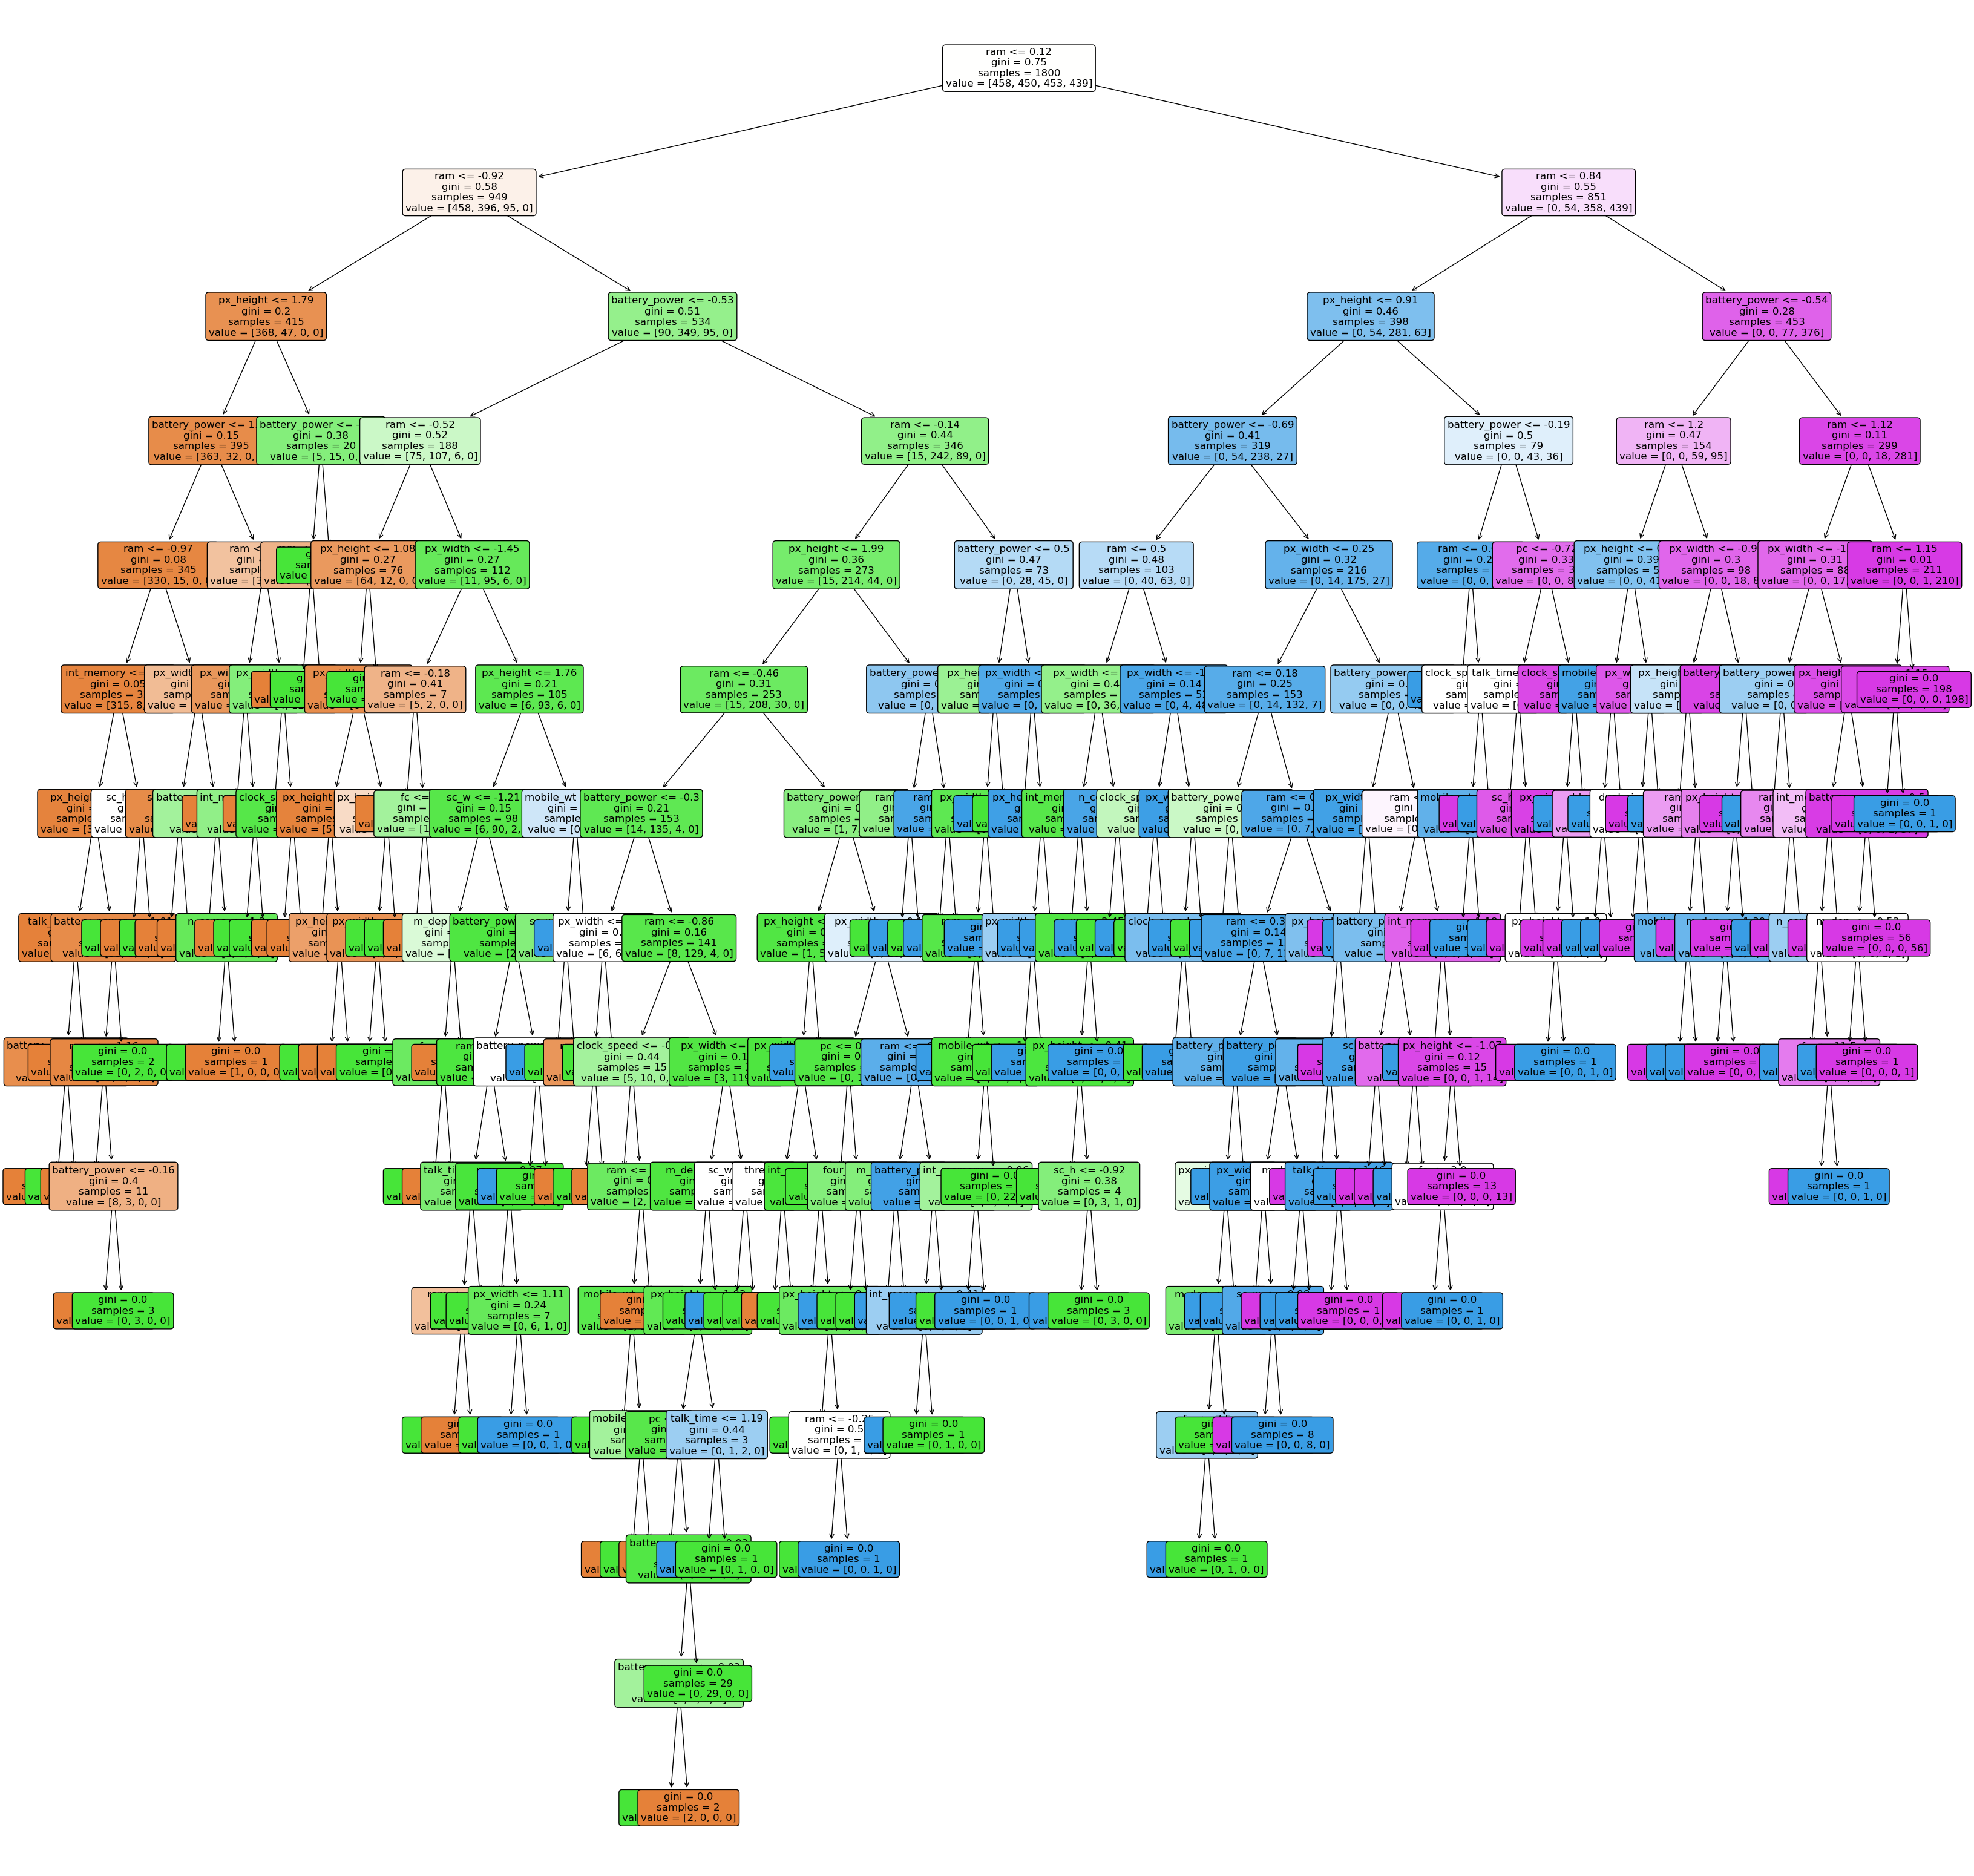

In [10]:
plt.figure(figsize = (40,40))
dec_tree = plot_tree(decision_tree=model, feature_names = df.columns, filled = True , fontsize=12, precision = 2,
                     rounded = True)

plt.savefig('dt.png')

# Evaluate model

In [11]:
y_pred = model.predict(X_test)
y_pred

array([3, 0, 2, 2, 3, 0, 0, 3, 3, 1, 1, 3, 0, 2, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 2, 2, 3, 1, 3, 1, 1, 0, 2, 0, 2, 3, 0, 0, 3, 3, 2, 1, 3, 3,
       2, 3, 0, 1, 3, 1, 0, 3, 0, 3, 0, 2, 3, 1, 0, 3, 3, 1, 3, 2, 1, 2,
       3, 2, 1, 2, 3, 2, 1, 0, 1, 3, 2, 2, 1, 2, 3, 3, 3, 0, 0, 0, 2, 1,
       2, 3, 1, 2, 2, 0, 0, 3, 3, 3, 0, 3, 2, 1, 3, 1, 3, 2, 2, 3, 2, 3,
       3, 0, 0, 1, 2, 3, 0, 1, 0, 0, 0, 3, 2, 2, 2, 1, 1, 1, 0, 2, 1, 3,
       2, 3, 3, 3, 3, 2, 0, 1, 1, 2, 2, 3, 0, 3, 0, 0, 1, 0, 2, 1, 2, 1,
       3, 1, 0, 3, 1, 3, 2, 1, 2, 1, 2, 3, 3, 2, 1, 0, 3, 2, 2, 2, 3, 0,
       2, 2, 3, 0, 3, 1, 0, 1, 2, 1, 2, 0, 2, 3, 1, 1, 0, 2, 3, 0, 1, 3,
       2, 0], dtype=int64)

In [12]:
print('accuracy_score: ',accuracy_score(y_test,y_pred))

accuracy_score:  0.86


In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        42
           1       0.88      0.76      0.82        50
           2       0.74      0.83      0.78        47
           3       0.92      0.90      0.91        61

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200



In [14]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[40,  2,  0,  0],
       [ 4, 38,  8,  0],
       [ 0,  3, 39,  5],
       [ 0,  0,  6, 55]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix Model')

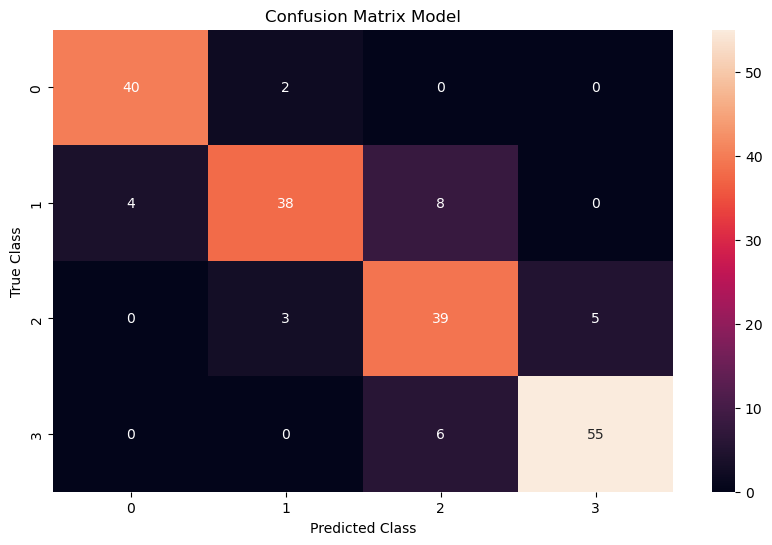

In [15]:
fig = plt.figure(figsize = (10, 6))
sns.heatmap(cm, annot = True, fmt = "d")

# Labeling the X-axis
plt.xlabel("Predicted Class")

# Labeling the Y-axis
plt.ylabel("True Class")

# Give a title to the graph
plt.title("Confusion Matrix Model")